### Importing the relevent libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
%matplotlib inline

### Data reading

In [2]:
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

<AxesSubplot:>

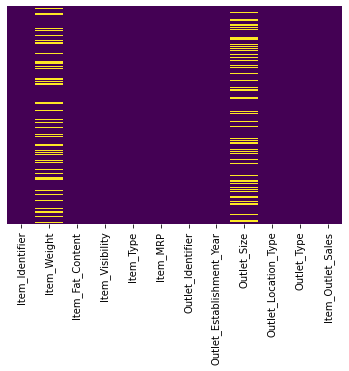

In [4]:
# checking for null value 
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

As we can see that Item_Weight and Outlet_Size have missing values

In [5]:
# Ratio of null value 
train.isnull().sum()/train.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
test.isnull().sum()/test.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

**We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.**

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# Categorical features in data 

categorical = train.select_dtypes(include=[np.object])


In [9]:
categorical.shape

(8523, 7)

In [10]:
numerical= train.select_dtypes(include =[np.float64,np.int64])

In [11]:
numerical.shape

(8523, 5)

In [12]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [13]:
# same as for test
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


### Data Cleaning

In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_Weight and Outlet_size have some missing value

**Item Weight**

<AxesSubplot:xlabel='Item_Weight'>

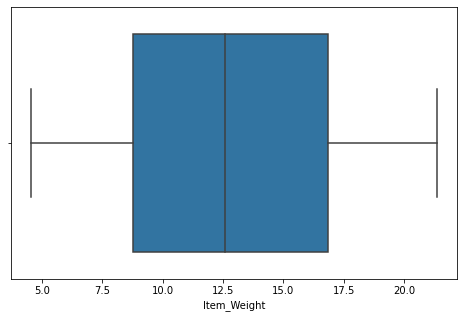

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot("Item_Weight", data = train)

<AxesSubplot:xlabel='Item_Weight'>

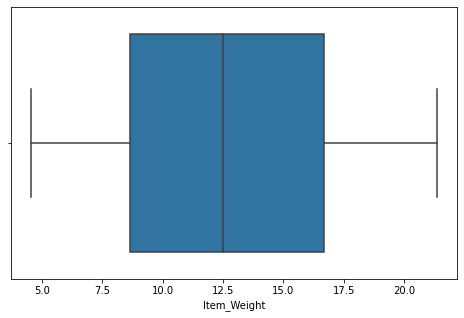

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [18]:
# Imputing with Mean
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [19]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Item_Weight

**Outlet Size**

In [20]:
train["Outlet_Size"].isnull().sum(), test["Outlet_Size"].isnull().sum()

(2410, 1606)

In [21]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the colum

In [22]:
train["Outlet_Size"].mode()

0    Medium
dtype: object

In [23]:
#Imputing with Mode
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [24]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size.

**Step 4: Exploratory Data Analysis**

In [25]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them.

In [28]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [29]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

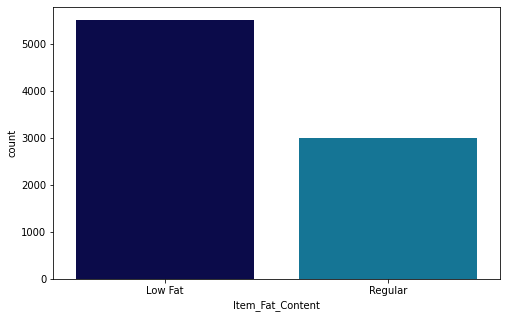

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

The Items bought are more of Low Fat.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

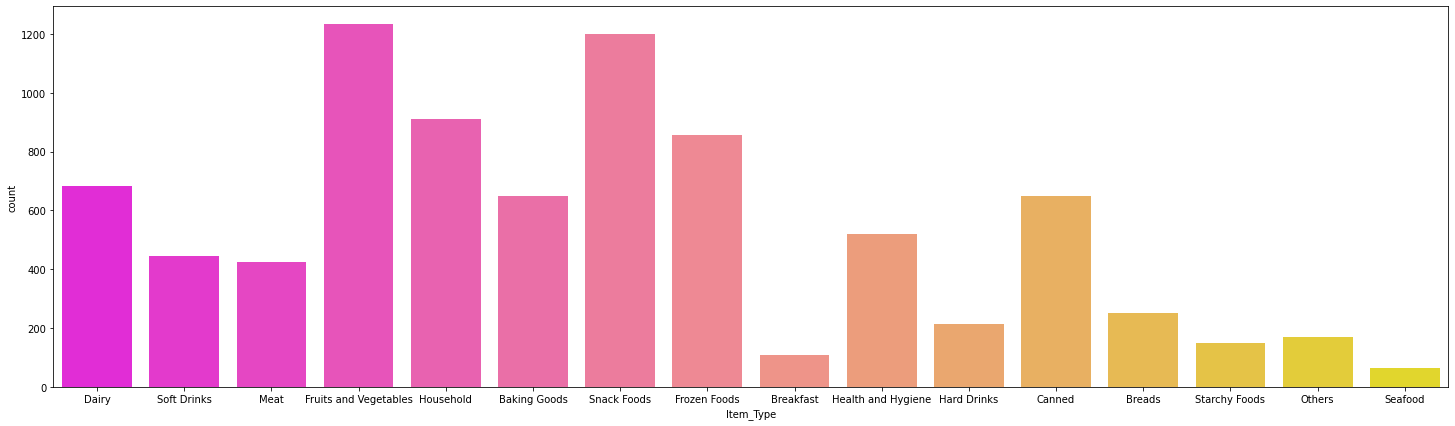

In [31]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

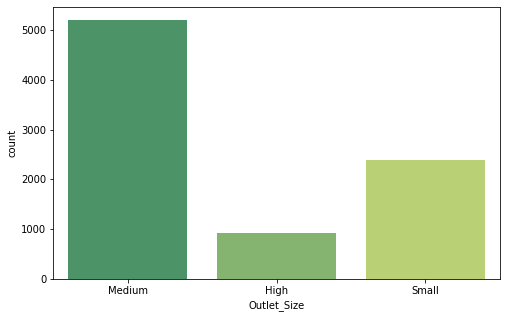

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

The Outlets are more of Medium Size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

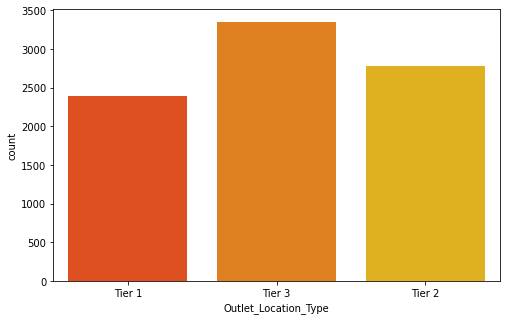

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

The Outlets are maximum in number in Tier 3 Cities

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

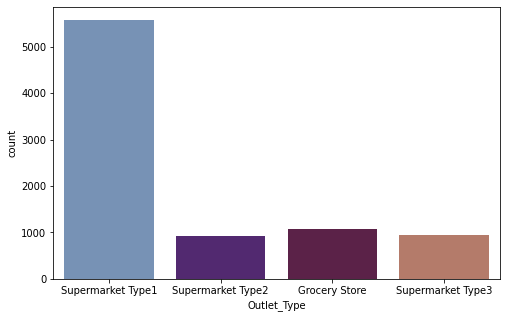

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

The Outlets are more of Supermarket Type1

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

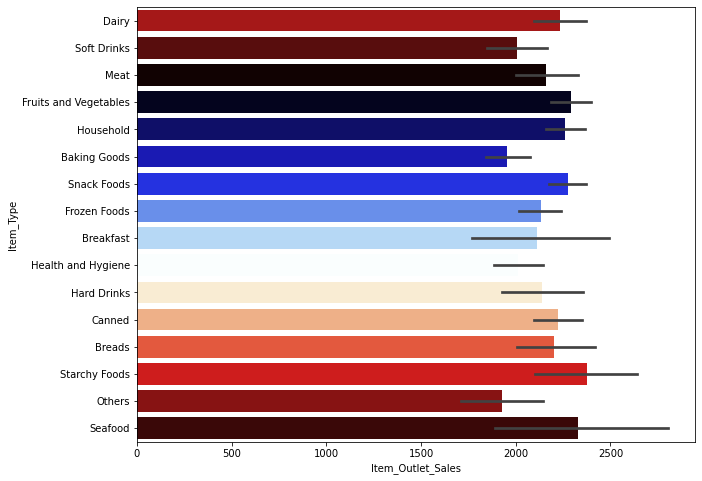

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

**Building Model**

In [36]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [37]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [38]:
train.shape

(8523, 12)

In [39]:
test.shape

(5681, 11)

In [40]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

In [41]:
# change the categorical value into numerical value 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
cat_mod = X.select_dtypes(include='object').columns

In [43]:
cat_mod

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [44]:
column_trans = make_column_transformer(
    (OneHotEncoder(), cat_mod),
    remainder='passthrough')

In [45]:
X = column_trans.fit_transform(X)

In [46]:
X.shape

(8523, 1601)

In [47]:
test_onehot = column_trans.transform(test)

In [48]:
test_onehot.shape

(5681, 1601)

Encoding the required columns from training and test dataset

In [49]:
# Splitting data into train test 
from sklearn.model_selection import train_test_split

In [50]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

**ML Models**

In [51]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
algos = [LinearRegression(), Ridge(),Lasso(), KNeighborsRegressor(),
        DecisionTreeRegressor(), RandomForestRegressor()]

In [54]:
names = ['LinearRegression','Ridge Regression','Lasso Regression',
        'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor']

In [55]:
rmse_list = []

for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    MSE = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [56]:
evaluation = pd.DataFrame({"Model":names,
                          "RMSE":rmse_list})

In [57]:
evaluation

,Model,RMSE
0,LinearRegression,1357.549990
1,Ridge Regression,1190.093989
2,Lasso Regression,1190.529149
3,KNeighborsRegressor,1284.249879
4,DecisionTreeRegressor,1483.757178
5,RandomForestRegressor,1186.799083


As we can clearly see RandomForestRegressor performs slighlty better than Ridge, lasso, Linear regression, KNN Regressor and Decision Tree Regressor.So we can select RandomForestRegressor for making our final predictions.

In [58]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [59]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [60]:
model = RandomForestRegressor()
model.fit(X, y)
final_predictions = model.predict(test_onehot)

In [61]:
submission["Item_Outlet_Sales"] = final_predictions

#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_new_submission.csv', index=False)

In [62]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1670.978234
1,FDW14,OUT017,1255.033000
2,NCN55,OUT010,540.822682
3,FDQ58,OUT017,2014.877250
4,FDY38,OUT027,5982.998644


**Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the dat**

In [63]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

In [64]:
params = {
    "n_estimators": [40,50,80,100],
    "max_depth": [2,3],
    "min_samples_leaf": [2,3]}

In [65]:
grid = GridSearchCV(estimator=RandomForestRegressor(),cv = 5,
                   param_grid=params,n_jobs=-1,verbose=1 )

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
regressor_grid = grid.best_estimator_

In [ ]:
regressor_grid.fit(X_train, y_train)

In [ ]:
y_pred_grid = regressor_grid.predict(X_valid)

In [ ]:
mse = mean_squared_error(y_valid, y_pred_grid)

rmse = np.sqrt(mse)
rmse

As we can see that this not as good as normal RandomForest Regressor is 

In [ ]:
##Let do the same using Support Vector machine 
from sklearn.svm import SVR

In [ ]:
regressor = SVR()

In [ ]:
#we can tune hyperparameter to get better result
from sklearn.model_selection import GridSearchCV

In [ ]:
# first we will look for only two kernal 'Linear' and 'poly'

# params = {
#     "C": [0.001, 0.01, 0.5, 1],
#     "degree": [2,3,4],
#     "kernel": ['linear', 'poly']}

# grid = GridSearchCV(regressor , params, cv = 5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
regressor_grid_lin = grid.best_estimator_

In [ ]:
regressor_grid_lin.fit(X_train, y_train)

In [ ]:
y_pred_lin = regressor_grid_lin.predict(X_valid)

In [ ]:
mse = mean_squared_error(y_valid, y_pred_lin)

rmse = np.sqrt(mse)
rmse

As we can see this also not as good as previos model are 
so let's change the kernel and try

In [ ]:
from sklearn.model_selection import GridSearchCV

regressor = SVR()

In [ ]:
params = {
    "C": [ 0.5, 1],
    "kernel": ["rbf"],
    "degree": [2,3,4,],
    "gamma": [0.1, 0.5, 1]}

grid = GridSearchCV(estimator=regressor, param_grid=params, cv=3)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
regressor_rbf = grid.best_estimator_

In [ ]:
y_pred_rbf = regressor_rbf.predict(X_valid)

In [ ]:
mse = mean_squared_error(y_valid, y_pred_rbf)

rmse = np.sqrt(mse)
rmse

As we can see that hyper tunning didn't work as we expected so let's take one more chance along with all the linear model 

### Models for Linear Regression 

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# note keep in mind that we have to put algorith name names as ordered as we will give to 'algos' 
algos = [LinearRegression(), Ridge(),Lasso(), KNeighborsRegressor(),
        DecisionTreeRegressor(), RandomForestRegressor(), SVR()]

names = ['LinearRegression','Ridge Regression','Lasso Regression',
        'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor',
         'Support VectorRegressor']

In [ ]:
np.random.seed(42)
rmse_list = []

for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

In [ ]:
evaluation = pd.DataFrame({"Model":names,
                         "RMSE":rmse_list})

In [ ]:
evaluation

now we can see that `Random Forest Regressor is the best between all models` so we will select that as model

### Making Submisson 

In [ ]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')


In [ ]:
model = RandomForestRegressor()
model.fit(X, y)
final_predictions = model.predict(test)

In [ ]:
submission["Item_Outlet_Sales"] = final_predictions

#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_second_submission.csv', index=False)

In [ ]:
submission.head()